In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image 
from urllib.request import urlopen 
from sklearn.decomposition import PCA

In [2]:
data = np.genfromtxt("data.txt",delimiter=",")
x_array = data[:,0]
y_array = data[:,1]

In [3]:
#initiating values
β0 = 1;β1 = 1;n=len(data);

In [4]:
#Question 1.3 : for β0 = 1 and β1 = 1
y_pred = β0 + β1*x_array
errors = y_array-y_pred
squared_errors = errors**2
sum_of_errors = sum(squared_errors)

loss_value = sum_of_errors/n 

print("Loss value for β0 = 1 and β1 = 1 is : ",loss_value)

Loss value for β0 = 1 and β1 = 1 is :  30068.440558989987


In [5]:
#Question 1.4:

iterations = 10
learning_rate = 0.001

for iteration in tqdm(range(iterations)):
    y_pred = β0 + β1*x_array
    𝛿β1 = -2*sum(x_array*(y_array-y_pred))/n
    𝛿β0 = -2*sum(y_array-y_pred)/n
    β0 = β0-learning_rate*𝛿β0 #changing β0 using learning rate and 𝛿β0
    β1 = β1-learning_rate*𝛿β1 #changing β1 using learning rate and 𝛿β1
    
print("After {} iterations, β0 = {} and β1 = {}".format(iterations,β0,β1))

  0%|          | 0/10 [00:00<?, ?it/s]

After 10 iterations, β0 = 0.6855626678299438 and β1 = 14.233847598602836


<font size="5">Problem 1 answers</font>

1) Loss Function is : Averaged Sum of Squared Errors = Mean Squared Error $$=\frac{1}{n}\sum_{i=0}^n (y_{actual}- y_{predicted})^2=\frac{1}{n}\sum_{i=0}^n (y_{i}- (β_{0}+β_{1}x_{i}))^2$$

2)
For Gradient function, we partially differentiate the loss function wrt both β<sub>0</sub> and β<sub>1</sub>.

$$𝛿β_{1} = \frac{1}{n}\sum_{i=0}^n 2(y_{i}- (β_{0}+β_{1}x_{i}))(-x_{i})$$

$$𝛿β_{1} = \frac{-2}{n}\sum_{i=0}^n x_{i}(y_{i}- \tilde{y_{i}})$$  

Similarly,

$$𝛿β_{0} = \frac{-2}{n}\sum_{i=0}^n (y_{i}- \tilde{y_{i}})$$  

3) Loss value for β<sub>0</sub> = 1 and β<sub>1</sub> = 1 : 30068.440558989987

4) Starting with β<sub>0</sub><sup>(1)</sup>=1 and β<sub>1</sub><sup>(1)</sup>=1, after 10 iterations, we get β<sub>0</sub><sup>(11)</sup>=0.6855626678299438 and β<sub>1</sub><sup>(11)</sup>=14.233847598602836

#  Problem 2


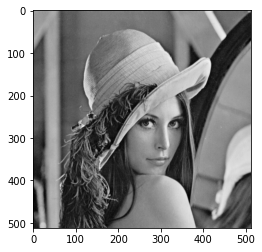

In [8]:
image_data = Image.open(urlopen("https://raw.githubusercontent.com/
                                changyaochen/MECE4520/master/lectures/lecture_1/leena.png")) 
X = np.array(image_data) 

plt.figure() 
plt.imshow(X, cmap="gray") 
# plt.imshow(image_data, cmap="gray")  # this also works 
plt.show()

In [9]:
#Question 2.1:
print("The element at index (128,128) of matrix X is :",str(X[128][128]))

The element at index (128,128) of matrix X is : 173


In [10]:
#Question 2.2:
X_scaled = []
for i in tqdm(range(X.shape[1])):    
    col = X[:,i] #one column at a time
    new_col = (col-col.mean())/col.std() #standardizing
    X_scaled.append(new_col) #appending to a new list
    
X_scaled = np.asarray(X_scaled).transpose() 
#consverting list ndarray and transposing to bring it back to original position

print("The element at index (128,128) of standardized matrix X is :",
      str(X_scaled[128][128]))

  0%|          | 0/512 [00:00<?, ?it/s]

The element at index (128,128) of standardized matrix X is : 1.2794041765058435


In [11]:
#Question 2.3:

pca = PCA()
pca_X = pca.fit_transform(X_scaled)
print("The first element of scaled X matrix after PCA is : ", pca.components_[0][0])

The first element of scaled X matrix after PCA is :  0.05842033740661615


In [12]:
#Question 2.4:

pca_50 = PCA(n_components=50)
pca_50_X = pca_50.fit_transform(X_scaled)

In [13]:
covariance_matrix = X - np.mean(X , axis = 1)
eigen_values, eigen_vectors = np.linalg.eigh(np.cov(covariance_matrix))
p = np.size(eigen_vectors, axis =1)
idx = np.argsort(eigen_values)
idx = idx[::-1]
eigen_vectors = eigen_vectors[:,idx]
eigen_values = eigen_values[idx]
principal_components = 50
if principal_components <p or principal_components >0:
    eigen_vectors = eigen_vectors[:, range(principal_components)]
    score = np.dot(eigen_vectors.T, covariance_matrix)
    reconstruction = np.dot(eigen_vectors, score) + np.mean(X, axis = 1).T 
    reconstructed_matrix = np.uint8(np.absolute(reconstruction))

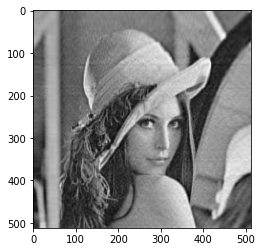

In [14]:
plt.figure() 
plt.imshow(reconstructed_matrix, cmap="gray")
plt.show()

In [15]:
k_sum = 0
n_sum = 0
for i in range(len(reconstructed_matrix)):
    k_sum += reconstructed_matrix[i][i]
    n_sum += X[i][i]   
    
print("The Reconstruction Error if 50 Principal components are used : ", 
      str(1-k_sum/n_sum))

The Reconstruction Error if 50 Principal components are used :  0.008731721488750455


<font size="5">Problem 2 answers</font>

1) The element at index (128,128) of matrix X is : 173

2) The element at index (128,128) of standardized matrix X is : 1.2794041765058435

3) The first element of scaled X matrix after PCA is : 0.05842033740661615

4) The Reconstruction Error if 50 Principal components are used : 0.008731721488750455

<font size="5">Problem 3 answers</font>

1) Total pool size is n. For bootstrapping, items are drawn with replacement. This suggests that there are n-1 items in the population that are not the j<sup>th</sup> observation. So, the probability that the first item is not j is:   $$\left(1-\frac{1}{n}\right)$$ 
   

2) Since we have n chances to draw something other than j, the probability that none of them are the j<sup>th</sup> sample is :  $$\left(1-\frac{1}{n}\right)^n$$ 


3) When n=10000: $$\prod_{i=1}^{10000} P_{Si ≠ j} = \left(1-\frac{1}{n}\right)^n  = \left(1-\frac{1}{10000}\right)^{10000} = 0.3678$$
